In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

# Load your CSV file
my_data = pd.read_csv('/content/Traffic_dataset(1).csv')

target_column = 'Flow1'

# Extract the target variable and reshape it
data = my_data[[target_column]].values.reshape(-1, 1)

# Data Preparation
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Split the data into input (X) and output (y)
look_back = 3  # Number of previous time steps to use as input features
X, y = [], []

for i in range(len(data) - look_back):
    X.append(data[i:(i + look_back)])
    y.append(data[i + look_back])

X, y = np.array(X), np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# LSTM Model
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=2)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions to the original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train_original = scaler.inverse_transform(y_train)
y_test_original = scaler.inverse_transform(y_test)


train_rmse = np.sqrt(mean_squared_error(y_train_original, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test_original, test_predict))


print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")



Epoch 1/20
1186/1186 - 5s - loss: 0.0380 - 5s/epoch - 4ms/step
Epoch 2/20
1186/1186 - 3s - loss: 0.0095 - 3s/epoch - 2ms/step
Epoch 3/20
1186/1186 - 2s - loss: 0.0046 - 2s/epoch - 2ms/step
Epoch 4/20
1186/1186 - 3s - loss: 0.0030 - 3s/epoch - 2ms/step
Epoch 5/20
1186/1186 - 3s - loss: 0.0028 - 3s/epoch - 3ms/step
Epoch 6/20
1186/1186 - 2s - loss: 0.0026 - 2s/epoch - 2ms/step
Epoch 7/20
1186/1186 - 3s - loss: 0.0024 - 3s/epoch - 2ms/step
Epoch 8/20
1186/1186 - 2s - loss: 0.0023 - 2s/epoch - 2ms/step
Epoch 9/20
1186/1186 - 3s - loss: 0.0021 - 3s/epoch - 3ms/step
Epoch 10/20
1186/1186 - 3s - loss: 0.0021 - 3s/epoch - 2ms/step
Epoch 11/20
1186/1186 - 3s - loss: 0.0021 - 3s/epoch - 2ms/step
Epoch 12/20
1186/1186 - 2s - loss: 0.0020 - 2s/epoch - 2ms/step
Epoch 13/20
1186/1186 - 2s - loss: 0.0021 - 2s/epoch - 2ms/step
Epoch 14/20
1186/1186 - 3s - loss: 0.0019 - 3s/epoch - 3ms/step
Epoch 15/20
1186/1186 - 2s - loss: 0.0020 - 2s/epoch - 2ms/step
Epoch 16/20
1186/1186 - 2s - loss: 0.0020 - 2s/ep

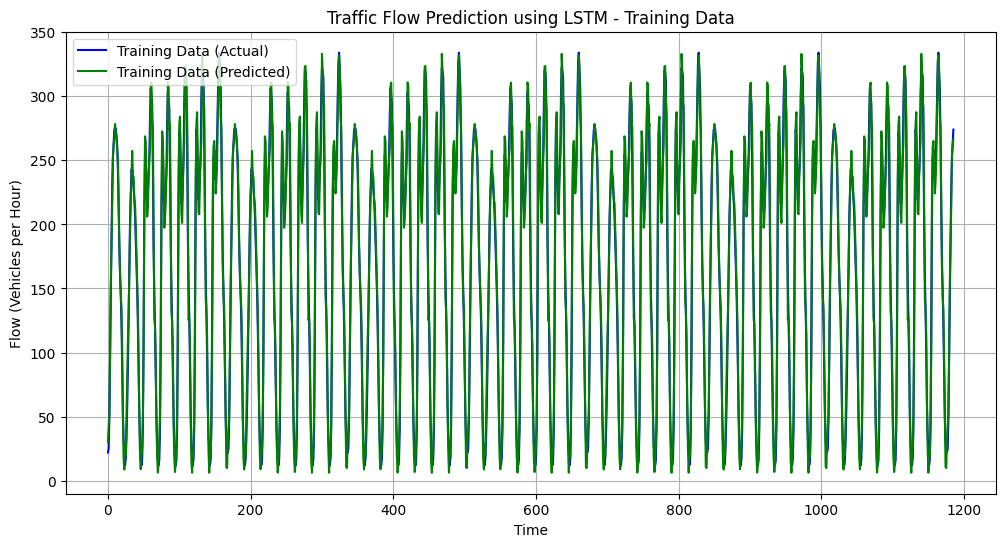

In [7]:
import matplotlib.pyplot as plt

# Plot training data and predictions
plt.figure(figsize=(12, 6))
plt.plot(y_train_original, label="Training Data (Actual)", color='blue')
plt.plot(train_predict, label="Training Data (Predicted)", color='green')

plt.title("Traffic Flow Prediction using LSTM - Training Data")
plt.xlabel("Time")
plt.ylabel("Flow (Vehicles per Hour)")
plt.legend()
plt.grid(True)
plt.show()


In [8]:
from sklearn.metrics import r2_score

# Calculate R-squared (R²) for the training and test data
train_r2 = r2_score(y_train_original, train_predict)
test_r2 = r2_score(y_test_original, test_predict)

print(f"R-squared (R²) - Train: {train_r2:.4f}")
print(f"R-squared (R²) - Test: {test_r2:.4f}")

def mean_absolute_scaled_error(y_true, y_pred, y_train):
    mase = np.mean(np.abs(y_true - y_pred)) / np.mean(np.abs(y_train[1:] - y_train[:-1]))
    return mase

# Calculate Mean Absolute Scaled Error (MASE) for the training and test data
train_mase = mean_absolute_scaled_error(y_train_original, train_predict, y_train_original)
test_mase = mean_absolute_scaled_error(y_test_original, test_predict, y_train_original)

print(f"Mean Absolute Scaled Error (MASE) - Train: {train_mase:.2f}")
print(f"Mean Absolute Scaled Error (MASE) - Test: {test_mase:.2f}")

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate Mean Absolute Percentage Error (MAPE) for the training and test data
train_mape = mean_absolute_percentage_error(y_train_original, train_predict)
test_mape = mean_absolute_percentage_error(y_test_original, test_predict)

print(f"Mean Absolute Percentage Error (MAPE) - Train: {train_mape:.2f}%")
print(f"Mean Absolute Percentage Error (MAPE) - Test: {test_mape:.2f}%")


R-squared (R²) - Train: 0.9820
R-squared (R²) - Test: 0.9809
Mean Absolute Scaled Error (MASE) - Train: 0.42
Mean Absolute Scaled Error (MASE) - Test: 0.43
Mean Absolute Percentage Error (MAPE) - Train: 15.55%
Mean Absolute Percentage Error (MAPE) - Test: 15.22%


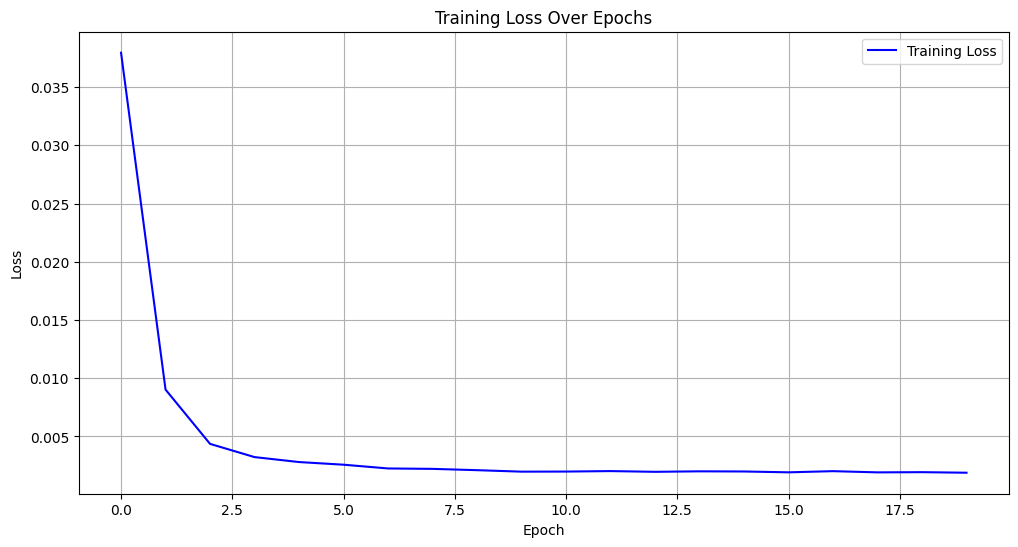

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(loss, label="Training Loss", color='blue')

plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()